In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

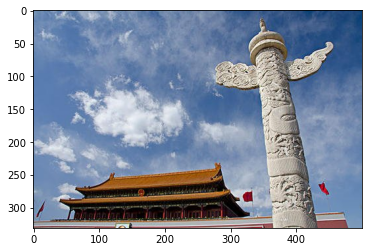

In [2]:
img = cv2.imread('gugong.jpg')

# imread 读的彩色图按照BGR像素储存，转换为RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

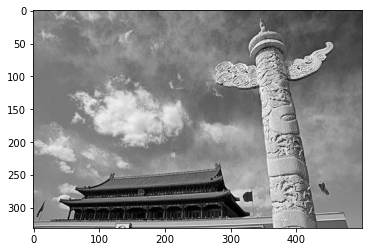

In [3]:
# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Normalize
grayImage = grayImage.astype('float32') / 255
plt.imshow(grayImage, cmap='gray')
plt.show()

Filter shape:  (4, 4)


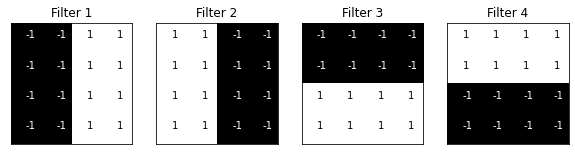

In [4]:
filter_vals = np.array([
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1]
])

print('Filter shape: ', filter_vals.shape)

# 定义滤波器
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# 可视化filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y, x), color='white' if filters[i][x][y] < 0 else 'black')

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from icecream import ic

In [26]:
class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        # 使用4个固定的filters，初始化卷积层的权重
        k_height, k_width = weight.shape[2:]
        # 这里有4个grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # 初始化卷积层权重
        self.conv.weight = nn.Parameter(weight)
        # 定义池化层
        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        # 计算卷积层，激活层，池化层输出
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        # 返回三层输出结果
        return conv_x, activated_x, pooled_x

In [27]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
ic(weight)
model = Net(weight)
ic(weight.shape)

ic| weight: tensor([[[[-1., -1.,  1.,  1.],
                      [-1., -1.,  1.,  1.],
                      [-1., -1.,  1.,  1.],
                      [-1., -1.,  1.,  1.]]],
            
            
                    [[[ 1.,  1., -1., -1.],
                      [ 1.,  1., -1., -1.],
                      [ 1.,  1., -1., -1.],
                      [ 1.,  1., -1., -1.]]],
            
            
                    [[[-1., -1., -1., -1.],
                      [-1., -1., -1., -1.],
                      [ 1.,  1.,  1.,  1.],
                      [ 1.,  1.,  1.,  1.]]],
            
            
                    [[[ 1.,  1.,  1.,  1.],
                      [ 1.,  1.,  1.,  1.],
                      [-1., -1., -1., -1.],
                      [-1., -1., -1., -1.]]]])
ic| weight.shape: torch.Size([4, 1, 4, 4])


torch.Size([4, 1, 4, 4])

In [28]:
def vis_layer(layer, n_filters=4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

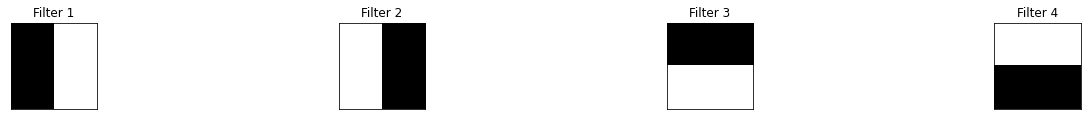

In [29]:
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

In [30]:
# 将图像转换为Tensor
ic(grayImage)
ic(grayImage.shape)
# 使用unsqueeze进行升维度
gray_img_tensor = torch.from_numpy(grayImage).unsqueeze(0).unsqueeze(1)
ic(gray_img_tensor.shape)

ic| grayImage: array([[0.5568628 , 0.5529412 , 0.54509807, ..., 0.22745098, 0.21568628,
                       0.20392157],
                      [0.54901963, 0.54901963, 0.54509807, ..., 0.21568628, 0.20392157,
                       0.19215687],
                      [0.5372549 , 0.5372549 , 0.5411765 , ..., 0.21960784, 0.20392157,
                       0.19215687],
                      ...,
                      [0.64705884, 0.6509804 , 0.64705884, ..., 0.5803922 , 0.5803922 ,
                       0.5803922 ],
                      [0.19215687, 0.2       , 0.20392157, ..., 0.5803922 , 0.5803922 ,
                       0.5803922 ],
                      [0.4745098 , 0.4862745 , 0.49803922, ..., 0.5803922 , 0.5803922 ,
                       0.5803922 ]], dtype=float32)
ic| grayImage.shape: (331, 500)
ic| gray_img_tensor.shape: torch.Size([1, 1, 331, 500])


torch.Size([1, 1, 331, 500])

In [31]:
# 得到卷积层的3输出：conv_x, activated_x, pooled_x
conv_layer, activated_layer, pool_layer = model(gray_img_tensor)

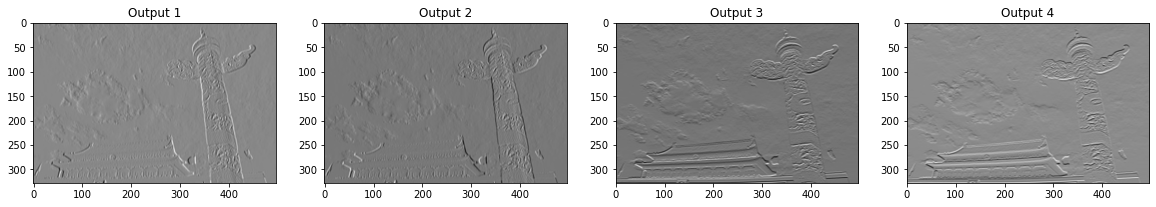

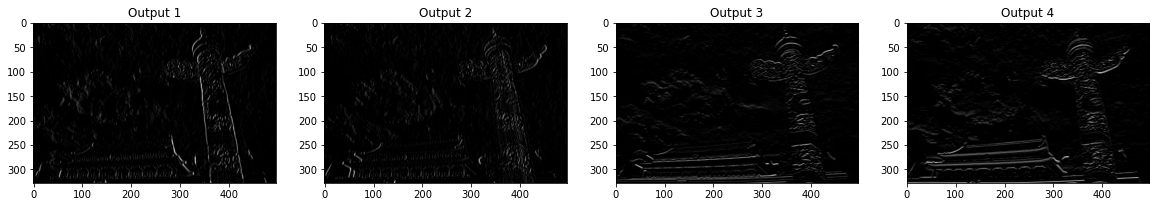

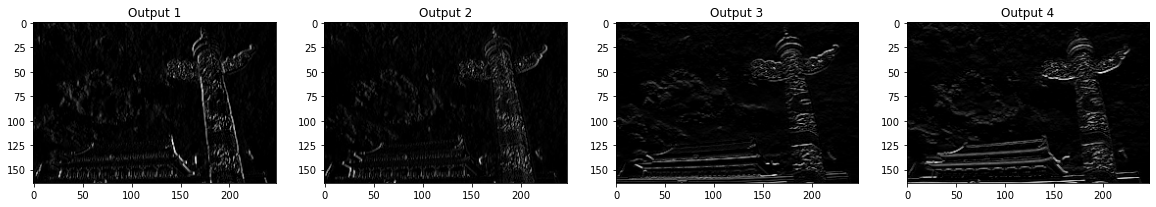

In [32]:
# conv layer可视化
vis_layer(conv_layer)
# activate layer可视化
vis_layer(activated_layer)
# pool layer可视化
vis_layer(pool_layer)